In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib import image as img
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.ensemble import GradientBoostingRegressor

from datetime import datetime

In [2]:
df = pd.read_csv('./train.csv', sep=',').set_index('row_id')

In [3]:
df.shape

(70128, 5)

In [4]:
df.sample(10)

,date,country,store,product,num_sold
row_id,,,,,
67122,2020-10-30,Germany,KaggleMart,Kaggle Recipe Book,244
26326,2018-07-03,Germany,KaggleRama,Kaggle Recipe Book,72
50137,2019-11-11,Italy,KaggleMart,Kaggle Getting Started,261
4464,2017-04-04,Belgium,KaggleMart,Kaggle Advanced Techniques,473
66668,2020-10-20,Spain,KaggleRama,Kaggle Advanced Techniques,97
5889,2017-05-03,Poland,KaggleMart,Kaggle Getting Started,79
33534,2018-11-30,Italy,KaggleRama,Kaggle Recipe Book,60
17989,2018-01-10,Poland,KaggleRama,Kaggle Getting Started,45
49226,2019-10-23,Italy,KaggleMart,Kaggle Recipe Book,176


In [5]:
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df.head()

,date,country,store,product,num_sold,year,month
row_id,,,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,01
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,01
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,01
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,01
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,01


In [6]:
df['product'].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [7]:
an = df.groupby('year')['month'].value_counts().unstack().fillna(0)
an

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2018,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2019,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2020,1488,1392,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488


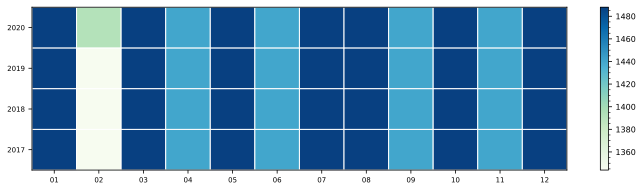

In [8]:
plt.figure(figsize=(12, 3))
plt.pcolor(an, cmap='GnBu', edgecolors='white', linewidths=1)
plt.xticks(np.arange(0.5, len(an.columns), 1), an.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(an.index), 1), an.index, fontsize=7)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [48]:
df_Kaggle_Advanced_Techniques = df[df['product'] == 'Kaggle Advanced Techniques']

In [49]:
df_Kaggle_Advanced_Techniques['date'] = pd.to_datetime(df_Kaggle_Advanced_Techniques['date'])
series_mean = df_Kaggle_Advanced_Techniques[['date', 'num_sold']].groupby(pd.Grouper(key='date', freq='W')).mean()
series_std = df_Kaggle_Advanced_Techniques[['date', 'num_sold']].groupby(pd.Grouper(key='date', freq='W')).std().fillna(0)

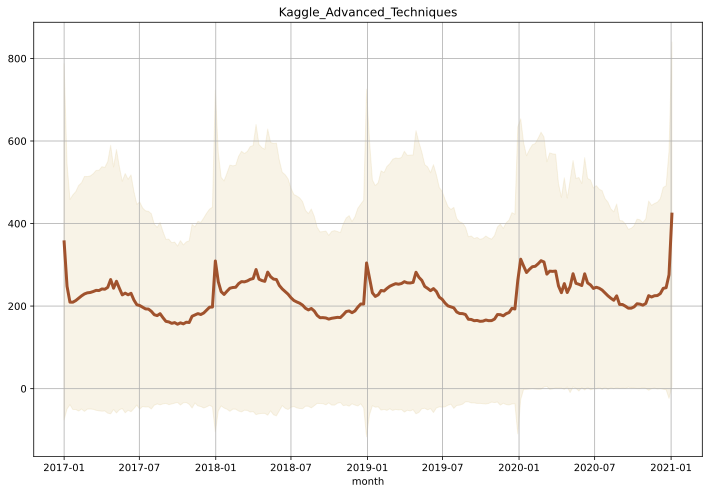

In [50]:
f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=3, color='sienna')
ax.fill_between(series_mean.index,
                (series_mean.values - 2 * series_std.values).ravel(),
                (series_mean.values + 2 * series_std.values).ravel(),
                color='darkgoldenrod', alpha=0.1)
plt.grid()
ax.set_title('Kaggle_Advanced_Techniques')
ax.set_xlabel('month')
plt.show()